# Github Repository URL

https://github.com/Triakshan/MLG382-CYO-Project--Group-C

# 1. Problem Statement

The Dunder Mifflin Paper Company, a well-known paper supplier situated in Scranton, Pennsylvania, is suffering a disturbing trend of excessive staff turnover, which is reducing operational efficiency and worker morale. We, the analytical team, are concerned about the company's high attrition rates, which we feel are damaging to its culture and performance. This research intends to use specific employee data, including tenure, income, work satisfaction, and departmental functions, to uncover major variables influencing employee turnover. We will create a prediction model based on detailed data analysis to put employees into three risk categories for leaving: extremely probable, moderately likely, and marginally likely. Our ultimate objective is to deliver actionable information that will assist in developing successful retention strategies to minimize turnover and improve overall employee engagement. Although the setting and data are fictitious and created for instructional reasons, the approaches used will closely resemble real-world analytical applications in human resource management, providing meaningful learning benefits.

# 2. Hypothesis Generation

We hypothesize that certain employee attributes and workplace conditions have a substantial impact on employee turnover at Dunder Mifflin Paper Company. We estimate that poorer job satisfaction, insufficient work-life balance, and longer travel lengths are highly related with increased risk of quitting the organization. Furthermore, we believe that employees with longer tenure, higher income, and recent promotions are less likely to quit, indicating that job stability and recognition are important determinants in employee retention. Our investigation aims to test these ideas by using predictive modelling approaches to categorize employees into distinct churn risk groups. By validating or disputing these assumptions, we will be able to pinpoint the most important areas for action to enhance retention methods and minimize staff turnover.

# 3. Prepare Data

## Import the libraries

In [1]:
import numpy as np
import pandas as pd

## Importing the dataset

https://www.kaggle.com/datasets/cocolicoq4/employee-churn-at-dunder-mifflin-paper-company

In [2]:
df = pd.read_csv('../../data/office_churn_dataset.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543 entries, 0 to 1542
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               1543 non-null   int64  
 1   Branch                   1535 non-null   object 
 2   Tenure                   1534 non-null   float64
 3   Salary                   1534 non-null   float64
 4   Department               1543 non-null   object 
 5   JobSatisfaction          1515 non-null   float64
 6   WorkLifeBalance          1515 non-null   float64
 7   CommuteDistance          1543 non-null   object 
 8   MaritalStatus            1543 non-null   object 
 9   Education                1543 non-null   object 
 10  PerformanceRating        1536 non-null   float64
 11  TrainingHours            1352 non-null   float64
 12  OverTime                 1443 non-null   object 
 13  NumProjects              1444 non-null   float64
 14  YearsSincePromotion     

,EmployeeID,Branch,Tenure,Salary,Department,JobSatisfaction,WorkLifeBalance,CommuteDistance,MaritalStatus,Education,PerformanceRating,TrainingHours,OverTime,NumProjects,YearsSincePromotion,EnvironmentSatisfaction,ChurnLikelihood
0,1,San Francisco,4.0,63000.0,Legal,3.0,3.0,Long,Married,High School,3.000000,88.0,True,3.0,0.0,2.0,Highly Likely to Churn
1,2,Chicago,14.0,72000.0,Accounting,4.0,4.0,Short,Single,Bachelor,3.666667,30.0,True,3.0,2.0,3.0,Moderately Likely to Churn
2,3,Miami,4.0,40000.0,Quality Assurance,3.0,3.0,Medium,Single,High School,3.666667,64.0,NaN,NaN,0.0,4.0,Highly Likely to Churn
3,4,Scranton,2.0,55000.0,Legal,3.0,3.5,Short,Married,Bachelor,3.666667,30.0,True,4.0,0.0,3.0,Moderately Likely to Churn
4,5,Scranton,10.0,55500.0,Legal,3.0,3.0,Medium,Married,Bachelor,3.333333,18.0,NaN,4.0,1.0,3.0,Moderately Likely to Churn


## Understanding each feature

## Remove irrelevant columns

In [3]:
irrelevant_features = ['EmployeeID']

df.drop(columns=irrelevant_features, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543 entries, 0 to 1542
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1535 non-null   object 
 1   Tenure                   1534 non-null   float64
 2   Salary                   1534 non-null   float64
 3   Department               1543 non-null   object 
 4   JobSatisfaction          1515 non-null   float64
 5   WorkLifeBalance          1515 non-null   float64
 6   CommuteDistance          1543 non-null   object 
 7   MaritalStatus            1543 non-null   object 
 8   Education                1543 non-null   object 
 9   PerformanceRating        1536 non-null   float64
 10  TrainingHours            1352 non-null   float64
 11  OverTime                 1443 non-null   object 
 12  NumProjects              1444 non-null   float64
 13  YearsSincePromotion      1542 non-null   float64
 14  EnvironmentSatisfaction 

# 4. Exploratory Data Analysis (EDA)

## i) Univariate Analysis

### Reading random records

In [4]:
df.sample(5)

,Branch,Tenure,Salary,Department,JobSatisfaction,WorkLifeBalance,CommuteDistance,MaritalStatus,Education,PerformanceRating,TrainingHours,OverTime,NumProjects,YearsSincePromotion,EnvironmentSatisfaction,ChurnLikelihood
680,Los Angeles,2.0,66000.0,Marketing,3.0,3.500000,Medium,Married,Bachelor,3.666667,NaN,True,3.000000,0.0,3.000000,Moderately Likely to Churn
19,Chicago,11.0,62000.0,Accounting,4.0,3.500000,Short,Married,High School,3.000000,40.00000,NaN,4.000000,4.0,2.000000,Highly Likely to Churn
765,Chicago,9.0,72000.0,Legal,3.0,NaN,Medium,Married,Bachelor,3.666667,12.00000,True,3.000000,1.0,2.000000,Highly Likely to Churn
531,Chicago,9.0,62500.0,Legal,4.0,3.609454,Long,Divorced,Bachelor,4.908176,18.71782,True,4.340873,1.0,2.697343,Moderately Likely to Churn
1450,New York,16.0,73500.0,Research and Development,2.0,3.000000,Long,Single,Bachelor,3.333333,12.00000,True,4.000000,4.0,3.000000,Moderately Likely to Churn


### Analysis of numerical attributes

In [5]:
df.describe()

,Tenure,Salary,JobSatisfaction,WorkLifeBalance,PerformanceRating,TrainingHours,NumProjects,YearsSincePromotion,EnvironmentSatisfaction
count,1534.000000,1534.000000,1515.000000,1515.000000,1536.000000,1352.000000,1444.000000,1542.000000,1515.000000
mean,7.612125,66654.498044,3.421782,3.770770,3.493310,34.645646,3.500687,1.203632,2.521421
std,4.123834,8473.622168,1.095047,0.481407,0.411208,22.970267,0.714107,2.059476,0.691325
min,0.000000,40000.000000,1.000000,2.000000,1.639834,5.196002,1.505266,0.000000,1.000000
25%,5.000000,61000.000000,3.000000,3.500000,3.333333,18.000000,3.000000,0.000000,2.000000
50%,7.000000,66500.000000,3.000000,4.000000,3.363192,30.000000,3.618543,0.000000,2.780499
75%,10.000000,72375.000000,4.000000,4.000000,3.666667,40.000000,4.000000,2.000000,3.000000
max,27.000000,98000.000000,5.000000,5.000000,5.000000,96.000000,6.394718,16.000000,5.000000


### Visualization of the data

#### Importing Libraries for Visualization

In [6]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#### Categorical Visualization

##### Branch

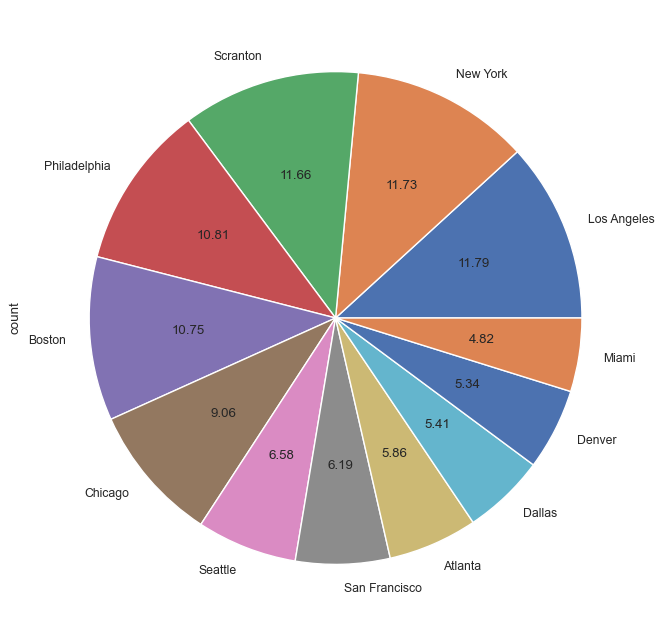

In [24]:
df["Branch"].value_counts().plot(kind="pie",autopct='%.2f', figsize=(10, 8), y='',x='');

#### Numerical Visualization

#### Comparing Target Values for Categorical Imbalances

In [ ]:
labels = (
    df['Churn']
    .astype('str')
    .str.replace('0','No', regex=True)
    .str.replace('1','Yes', regex=True)
    .value_counts()
)

fig = px.bar(
    data_frame=labels, 
    x=labels.index, 
    y=labels.values, 
    title=f'Class Imbalance', 
    color=labels.index
)

fig.update_layout(xaxis_title='Churn Status', yaxis_title='Number of Customers')
fig.show()

## ii) Bivariate Analysis

# 5. Preprocess Data

## Analyze the data

In [56]:
import skimpy as sk
sk.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1543   │ │ float64     │ 9     │                                                          │
│ │ Number of columns │ 16     │ │ string      │ 6     │                                                          │
│ └───────────────────┴────────┘ │ bool        │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA   ┃ NA %   ┃ mean   ┃ sd    ┃ p0     ┃ p25    ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ Tenure                 │    9 │   0.58 │    7.6 │   4.1 │      0 │      5 │     7 │    10 │    27 │  ▅▇▅▁  │  │
│ │ Salary                 │    9 │   0.58 │  67000 │  8500 │  40000 │  61000 │ 66000 │ 72000 │ 98000 │  ▃▇▇▁  │  │
│ │ JobSatisfaction        │   28 │   1.81 │    3.4 │   1.1 │      1 │      3 │     3 │     4 │     5 │ ▁▅ ▇▇▅ │  │
│ │ WorkLifeBalance        │   28 │   1.81 │    3.8 │  0.48 │      2 │    3.5 │     4 │     4 │     5 │   ▃▇▇▃ │  │
│ │ PerformanceRating      │    7 │   0.45 │    3.5 │  0.41 │    1.6 │    3.3 │   3.4 │   3.7 │     5 │  ▁▂▇▃  │  │
│ │ TrainingHours          │  191 │  12.38 │     35 │    23 │    5.2 │     18 │    30 │    40 │    96 │ ▇▇▃▂▂▁ │  │
│ │ NumProjects            │   99 │   6.42 │    3.5 │  0.71 │    1.5 │      3 │   3.6 │     4 │   6.4 │ ▁▇ ▇▁  │  │
│ │ YearsSincePromotion    │    1 │   0.06 │    1.2 │   2.1 │      0 │      0 │     0 │     2 │    16 │   ▇▁   │  │
│ │ EnvironmentSatisfactio │   28 │   1.81 │    2.5 │  0.69 │      1 │      2 │   2.8 │     3 │     5 │ ▁▇▁▇▁  │  │
│ │ n                      │      │        │        │       │        │        │       │       │       │        │  │
│ └────────────────────────┴──────┴────────┴────────┴───────┴────────┴────────┴───────┴───────┴───────┴────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ true            ┃ true rate                     ┃ hist                ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ OverTime                           │            1543 │                             1 │           ▇         │  │
│ └────────────────────────────────────┴─────────────────┴───────────────────────────────┴─────────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                     ┃ NA     ┃ NA %       ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Branch                          │      8 │       0.5

## Handling rows without Churned

In [57]:
df.dropna(subset='ChurnLikelihood', inplace=True)

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543 entries, 0 to 1542
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1535 non-null   object 
 1   Tenure                   1534 non-null   float64
 2   Salary                   1534 non-null   float64
 3   Department               1543 non-null   object 
 4   JobSatisfaction          1515 non-null   float64
 5   WorkLifeBalance          1515 non-null   float64
 6   CommuteDistance          1543 non-null   object 
 7   MaritalStatus            1543 non-null   object 
 8   Education                1543 non-null   object 
 9   PerformanceRating        1536 non-null   float64
 10  TrainingHours            1352 non-null   float64
 11  OverTime                 1443 non-null   object 
 12  NumProjects              1444 non-null   float64
 13  YearsSincePromotion      1542 non-null   float64
 14  EnvironmentSatisfaction 

,Branch,Tenure,Salary,Department,JobSatisfaction,WorkLifeBalance,CommuteDistance,MaritalStatus,Education,PerformanceRating,TrainingHours,OverTime,NumProjects,YearsSincePromotion,EnvironmentSatisfaction,ChurnLikelihood
0,San Francisco,4.0,63000.0,Legal,3.0,3.0,Long,Married,High School,3.000000,88.0,True,3.0,0.0,2.0,Highly Likely to Churn
1,Chicago,14.0,72000.0,Accounting,4.0,4.0,Short,Single,Bachelor,3.666667,30.0,True,3.0,2.0,3.0,Moderately Likely to Churn
2,Miami,4.0,40000.0,Quality Assurance,3.0,3.0,Medium,Single,High School,3.666667,64.0,NaN,NaN,0.0,4.0,Highly Likely to Churn
3,Scranton,2.0,55000.0,Legal,3.0,3.5,Short,Married,Bachelor,3.666667,30.0,True,4.0,0.0,3.0,Moderately Likely to Churn
4,Scranton,10.0,55500.0,Legal,3.0,3.0,Medium,Married,Bachelor,3.333333,18.0,NaN,4.0,1.0,3.0,Moderately Likely to Churn


## Handling duplicate values

In [58]:
print(df.duplicated().value_counts())
df.drop_duplicates()

False    1543
Name: count, dtype: int64


,Branch,Tenure,Salary,Department,JobSatisfaction,WorkLifeBalance,CommuteDistance,MaritalStatus,Education,PerformanceRating,TrainingHours,OverTime,NumProjects,YearsSincePromotion,EnvironmentSatisfaction,ChurnLikelihood
0,San Francisco,4.0,63000.0,Legal,3.0,3.000000,Long,Married,High School,3.000000,88.000000,True,3.000000,0.0,2.000000,Highly Likely to Churn
1,Chicago,14.0,72000.0,Accounting,4.0,4.000000,Short,Single,Bachelor,3.666667,30.000000,True,3.000000,2.0,3.000000,Moderately Likely to Churn
2,Miami,4.0,40000.0,Quality Assurance,3.0,3.000000,Medium,Single,High School,3.666667,64.000000,NaN,NaN,0.0,4.000000,Highly Likely to Churn
3,Scranton,2.0,55000.0,Legal,3.0,3.500000,Short,Married,Bachelor,3.666667,30.000000,True,4.000000,0.0,3.000000,Moderately Likely to Churn
4,Scranton,10.0,55500.0,Legal,3.0,3.000000,Medium,Married,Bachelor,3.333333,18.000000,NaN,4.000000,1.0,3.000000,Moderately Likely to Churn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1538,Miami,6.0,58000.0,Research and Development,4.0,4.000000,Long,Married,Bachelor,4.000000,12.000000,True,4.000000,0.0,3.000000,Highly Likely to Churn
1539,Boston,1.0,51500.0,Accounting,2.0,3.500000,Medium,Divorced,High School,3.666667,32.000000,True,4.000000,0.0,3.000000,Moderately Likely to Churn
1540,San Francisco,11.0,77500.0,Human Resources,4.0,4.029174,Long,Married,Bachelor,3.819578,11.040847,True,4.122893,3.0,4.791749,Slightly Likely to Churn
1541,New York,NaN,81000.0,Research and Development,4.0,3.000000,Medium,Married,Master,3.000000,18.000000,True,3.000000,0.0,NaN,Highly Likely to Churn


## Handling high and low cardinality features

In [59]:
# checking the cardinality of features
df.select_dtypes("object").nunique()

Branch             12
Department         15
CommuteDistance     3
MaritalStatus       3
Education           3
OverTime            1
ChurnLikelihood     3
dtype: int64

### Drop high cardinality features

In [60]:
high_cardinality = ['OverTime']

df.drop(columns=high_cardinality, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543 entries, 0 to 1542
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1535 non-null   object 
 1   Tenure                   1534 non-null   float64
 2   Salary                   1534 non-null   float64
 3   Department               1543 non-null   object 
 4   JobSatisfaction          1515 non-null   float64
 5   WorkLifeBalance          1515 non-null   float64
 6   CommuteDistance          1543 non-null   object 
 7   MaritalStatus            1543 non-null   object 
 8   Education                1543 non-null   object 
 9   PerformanceRating        1536 non-null   float64
 10  TrainingHours            1352 non-null   float64
 11  NumProjects              1444 non-null   float64
 12  YearsSincePromotion      1542 non-null   float64
 13  EnvironmentSatisfaction  1515 non-null   float64
 14  ChurnLikelihood         

## Handling empty cells

In [61]:
print(df.isnull().sum())

Branch                       8
Tenure                       9
Salary                       9
Department                   0
JobSatisfaction             28
WorkLifeBalance             28
CommuteDistance              0
MaritalStatus                0
Education                    0
PerformanceRating            7
TrainingHours              191
NumProjects                 99
YearsSincePromotion          1
EnvironmentSatisfaction     28
ChurnLikelihood              0
dtype: int64


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543 entries, 0 to 1542
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1535 non-null   object 
 1   Tenure                   1534 non-null   float64
 2   Salary                   1534 non-null   float64
 3   Department               1543 non-null   object 
 4   JobSatisfaction          1515 non-null   float64
 5   WorkLifeBalance          1515 non-null   float64
 6   CommuteDistance          1543 non-null   object 
 7   MaritalStatus            1543 non-null   object 
 8   Education                1543 non-null   object 
 9   PerformanceRating        1536 non-null   float64
 10  TrainingHours            1352 non-null   float64
 11  NumProjects              1444 non-null   float64
 12  YearsSincePromotion      1542 non-null   float64
 13  EnvironmentSatisfaction  1515 non-null   float64
 14  ChurnLikelihood         

### Fill categorical value(s)

In [63]:
for col in df.select_dtypes(include=['object']).columns:
    df[col]=df[col].fillna(df[col].mode()[0])

df.isnull().sum()

Branch                       0
Tenure                       9
Salary                       9
Department                   0
JobSatisfaction             28
WorkLifeBalance             28
CommuteDistance              0
MaritalStatus                0
Education                    0
PerformanceRating            7
TrainingHours              191
NumProjects                 99
YearsSincePromotion          1
EnvironmentSatisfaction     28
ChurnLikelihood              0
dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543 entries, 0 to 1542
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1543 non-null   object 
 1   Tenure                   1534 non-null   float64
 2   Salary                   1534 non-null   float64
 3   Department               1543 non-null   object 
 4   JobSatisfaction          1515 non-null   float64
 5   WorkLifeBalance          1515 non-null   float64
 6   CommuteDistance          1543 non-null   object 
 7   MaritalStatus            1543 non-null   object 
 8   Education                1543 non-null   object 
 9   PerformanceRating        1536 non-null   float64
 10  TrainingHours            1352 non-null   float64
 11  NumProjects              1444 non-null   float64
 12  YearsSincePromotion      1542 non-null   float64
 13  EnvironmentSatisfaction  1515 non-null   float64
 14  ChurnLikelihood         

### Fill numerical value(s)

In [65]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col].fillna(df[col].mean(), inplace=True)

df.isnull().sum()

Branch                     0
Tenure                     0
Salary                     0
Department                 0
JobSatisfaction            0
WorkLifeBalance            0
CommuteDistance            0
MaritalStatus              0
Education                  0
PerformanceRating          0
TrainingHours              0
NumProjects                0
YearsSincePromotion        0
EnvironmentSatisfaction    0
ChurnLikelihood            0
dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543 entries, 0 to 1542
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1543 non-null   object 
 1   Tenure                   1543 non-null   float64
 2   Salary                   1543 non-null   float64
 3   Department               1543 non-null   object 
 4   JobSatisfaction          1543 non-null   float64
 5   WorkLifeBalance          1543 non-null   float64
 6   CommuteDistance          1543 non-null   object 
 7   MaritalStatus            1543 non-null   object 
 8   Education                1543 non-null   object 
 9   PerformanceRating        1543 non-null   float64
 10  TrainingHours            1543 non-null   float64
 11  NumProjects              1543 non-null   float64
 12  YearsSincePromotion      1543 non-null   float64
 13  EnvironmentSatisfaction  1543 non-null   float64
 14  ChurnLikelihood         

## Outlier Treatment

### Visualize the outliers of the numerical features

In [67]:
# Plot / Visualize the outliers of the numerical features
import matplotlib.pyplot as plt
import plotly.express as px

for col in df.select_dtypes(include=['int64', 'float64']).columns:
    fig = px.box(
        data_frame=df, 
        x=col,
        orientation='h',
        title=f'Boxplot of the Target ({col}) - With Outliers'
    )
    fig.show()

### Handling Outliers

#### Create a mask to filter out the outliers for 'Age'

In [68]:
mask_Tenure = df['Tenure'] <= 17

fig = px.box(
    data_frame=df[mask_Tenure], 
    x='Tenure', 
    orientation='h',
    title='Boxplot of the Target (Tenure) - Without Outliers')

fig.update_layout(xaxis_title='Target')
fig.show()

#### Create a mask to filter out the outliers for 'Salary'

In [69]:
mask_Salary1 = df['Salary'] >= 44_500
mask_Salary2 = df['Salary'] <= 88_000

fig = px.box(
    data_frame=df[mask_Salary1 & mask_Salary2], 
    x='Salary',
    orientation='h',
    title='Boxplot of the Target (Salary) - Without Outliers')

fig.update_layout(xaxis_title='Target')
fig.show()

#### Create a mask to filter out the outliers for 'JobSatisfaction'

In [70]:
mask_JobSatisfaction = df['JobSatisfaction'] >= 2

fig = px.box(
    data_frame=df[mask_JobSatisfaction], 
    x='JobSatisfaction', 
    orientation='h',
    title='Boxplot of the Target (JobSatisfaction) - Without Outliers')

fig.update_layout(xaxis_title='Target')
fig.show()

#### Create a mask to filter out the outliers for 'WorkLifeBalance'

In [71]:
mask_WorkLifeBalance1 = df['WorkLifeBalance'] >= 2.840207
mask_WorkLifeBalance2 = df['WorkLifeBalance'] <= 4.712464

fig = px.box(
    data_frame=df[mask_WorkLifeBalance1 & mask_WorkLifeBalance2], 
    x='WorkLifeBalance', 
    orientation='h',
    title='Boxplot of the Target (WorkLifeBalance) - Without Outliers')

fig.update_layout(xaxis_title='Target')
fig.show()

#### Create a mask to filter out the outliers for 'PerformanceRating'

In [72]:
mask_PerformanceRating1 = df['PerformanceRating'] >= 2.835084
mask_PerformanceRating2 = df['PerformanceRating'] <= 4.13773

fig = px.box(
    data_frame=df[mask_PerformanceRating1 & mask_PerformanceRating2], 
    x='PerformanceRating', 
    orientation='h',
    title='Boxplot of the Target (PerformanceRating) - Without Outliers')

fig.update_layout(xaxis_title='Target')
fig.show()

#### Create a mask to filter out the outliers for 'TrainingHours'

In [73]:
mask_TrainingHours = df['TrainingHours'] <= 57

fig = px.box(
    data_frame=df[mask_TrainingHours], 
    x='TrainingHours', 
    orientation='h',
    title='Boxplot of the Target (TrainingHours) - Without Outliers')

fig.update_layout(xaxis_title='Target')
fig.show()

#### Create a mask to filter out the outliers for 'NumProjects'

In [74]:
mask_NumProjects = df['NumProjects'] <= 5.4

fig = px.box(
    data_frame=df[mask_NumProjects], 
    x='NumProjects', 
    orientation='h',
    title='Boxplot of the Target (NumProjects) - Without Outliers')

fig.update_layout(xaxis_title='Target')
fig.show()

#### Create a mask to filter out the outliers for 'YearsSincePromotion'

In [75]:
mask_YearsSincePromotion = df['YearsSincePromotion'] <= 2

fig = px.box(
    data_frame=df[mask_YearsSincePromotion], 
    x='YearsSincePromotion', 
    orientation='h',
    title='Boxplot of the Target (YearsSincePromotion) - Without Outliers')

fig.update_layout(xaxis_title='Target')
fig.show()

#### Create a mask to filter out the outliers for 'EnvironmentSatisfaction'

In [76]:
mask_EnvironmentSatisfaction = df['EnvironmentSatisfaction'] <= 4.2

fig = px.box(
    data_frame=df[mask_EnvironmentSatisfaction], 
    x='EnvironmentSatisfaction', 
    orientation='h',
    title='Boxplot of the Target (EnvironmentSatisfaction) - Without Outliers')

fig.update_layout(xaxis_title='Target')
fig.show()

### Filtering out the outliers

In [77]:
df = df[mask_Tenure & mask_Salary1 & mask_Salary2 & mask_JobSatisfaction & mask_WorkLifeBalance1 & mask_WorkLifeBalance2 & mask_PerformanceRating1 & mask_PerformanceRating2 & mask_TrainingHours & mask_NumProjects & mask_YearsSincePromotion & mask_EnvironmentSatisfaction]

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 904 entries, 1 to 1541
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   904 non-null    object 
 1   Tenure                   904 non-null    float64
 2   Salary                   904 non-null    float64
 3   Department               904 non-null    object 
 4   JobSatisfaction          904 non-null    float64
 5   WorkLifeBalance          904 non-null    float64
 6   CommuteDistance          904 non-null    object 
 7   MaritalStatus            904 non-null    object 
 8   Education                904 non-null    object 
 9   PerformanceRating        904 non-null    float64
 10  TrainingHours            904 non-null    float64
 11  NumProjects              904 non-null    float64
 12  YearsSincePromotion      904 non-null    float64
 13  EnvironmentSatisfaction  904 non-null    float64
 14  ChurnLikelihood          904 n

,Branch,Tenure,Salary,Department,JobSatisfaction,WorkLifeBalance,CommuteDistance,MaritalStatus,Education,PerformanceRating,TrainingHours,NumProjects,YearsSincePromotion,EnvironmentSatisfaction,ChurnLikelihood
1,Chicago,14.0,72000.0,Accounting,4.0,4.0,Short,Single,Bachelor,3.666667,30.000000,3.0,2.0,3.0,Moderately Likely to Churn
3,Scranton,2.0,55000.0,Legal,3.0,3.5,Short,Married,Bachelor,3.666667,30.000000,4.0,0.0,3.0,Moderately Likely to Churn
4,Scranton,10.0,55500.0,Legal,3.0,3.0,Medium,Married,Bachelor,3.333333,18.000000,4.0,1.0,3.0,Moderately Likely to Churn
6,Boston,10.0,82000.0,Sales,5.0,3.0,Medium,Married,Bachelor,3.666667,34.645646,3.0,1.0,3.0,Moderately Likely to Churn
7,New York,6.0,59000.0,Administration,3.0,3.5,Short,Divorced,High School,3.333333,40.000000,3.0,0.0,3.0,Moderately Likely to Churn


## Scaling

In [78]:
df['ChurnLikelihood'] = df['ChurnLikelihood'].map({'Slightly Likely to Churn' : 0, 'Moderately Likely to Churn' : 1, 'Highly Likely to Churn' : 2}).astype('int')

# 6. Modeling

## Split Data

In [79]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['ChurnLikelihood'], inplace=False)
y = df['ChurnLikelihood']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Build Model

In [80]:
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_dt = make_pipeline(
    OneHotEncoder(use_cat_names=True), # encode cat features
    StandardScaler(), # imputation
    DecisionTreeClassifier()) # build model

model_rf = make_pipeline(
    OneHotEncoder(use_cat_names=True), # encode cat features
    StandardScaler(), # imputation
    RandomForestClassifier()) # build model

model_lr = make_pipeline(
    OneHotEncoder(use_cat_names=True), # encode cat features
    StandardScaler(), # imputation
    LogisticRegression()) # build model

# fit the model
model_dt.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_lr.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Branch', 'Department', 'CommuteDistance',
                                     'MaritalStatus', 'Education'],
                               use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

## Accuracy of Model

In [81]:
from sklearn.metrics import accuracy_score

y_pred = model_dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", (accuracy*100).__round__(4))

y_pred = model_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier:", (accuracy*100).__round__(4))

y_pred = model_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression:", (accuracy*100).__round__(4))

Decision Tree Accuracy: 98.3425
Random Forest Classifier: 98.3425
Logistic Regression: 98.895


## Evaluate

In [82]:
from sklearn.metrics import mean_absolute_error

# Decision Tree
# Predict the train data
y_pred_training = model_dt.predict(X_train)
y_pred_test = model_dt.predict(X_test)

# Compute MAE
print("Training MAE:", round(mean_absolute_error(y_train, y_pred_training),2))
print("Test data MAE:", round(mean_absolute_error(y_test, y_pred_test),2))

# Random Forest Regressor
# Predict the train data
y_pred_training = model_rf.predict(X_train)
y_pred_test = model_rf.predict(X_test)

# Compute MAE
print("Training MAE:", round(mean_absolute_error(y_train, y_pred_training),2))
print("Test data MAE:", round(mean_absolute_error(y_test, y_pred_test),2))

# Logistic Regression
# Predict the train data
y_pred_training = model_lr.predict(X_train)
y_pred_test = model_lr.predict(X_test)

# Compute MAE
print("Training MAE:", round(mean_absolute_error(y_train, y_pred_training),2))
print("Test data MAE:", round(mean_absolute_error(y_test, y_pred_test),2))

Training MAE: 0.0
Test data MAE: 0.02
Training MAE: 0.0
Test data MAE: 0.02
Training MAE: 0.01
Test data MAE: 0.01


In [83]:
features = model_lr.named_steps["onehotencoder"].get_feature_names()
coefs = model_lr.named_steps["logisticregression"].coef_[0]

C:\Users\hroux\AppData\Roaming\Python\Python311\site-packages\category_encoders\utils.py:366: FutureWarning:

`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.



In [84]:
import numpy as np

odds_ratios = pd.Series(np.exp(coefs), index=features).sort_values()
odds_ratios.head()

Branch_Miami             0.519009
TrainingHours            0.596666
Branch_Atlanta           0.610408
Branch_Seattle           0.663997
Education_High School    0.671927
dtype: float64

In [85]:
plt.Figure(figsize=(15,10))
fig = px.bar(
    data_frame=odds_ratios, 
    x=odds_ratios[:10].values, 
    y=odds_ratios[:10].index,
    title="Customer Churn Logistic Regression, Feature Importance (Odds Ratio)"
)

fig.update_layout(xaxis_title='Odds Ratio', yaxis_title='')
fig.show()

## Predict

In [86]:
def make_prediction(row):

    data = {
        "Branch": row[1],
        "Tenure": row[2],
        "Salary": row[3],
        "Department": row[4],
        "JobSatisfaction": row[5],
        "WorkLifeBalance": row[6],
        "CommuteDistance": row[7],
        "MaritalStatus": row[8],
        "Education": row[9],
        "PerformanceRating": row[10],
        "TrainingHours": row[11],
        "NumProjects": row[12],
        "YearsSincePromotion": row[13],
        "EnvironmentSatisfaction": row[14]
    }

    df_predict = pd.DataFrame(data, index=[0])
    prediction_dt = model_dt.predict(df_predict)[0]
    prediction_rf = model_rf.predict(df_predict)[0]
    prediction_lr = model_lr.predict(df_predict)[0]
    return f"Decision Tree: {prediction_dt}; Random Forest: {prediction_rf} Logistic Regression: {prediction_lr}"

In [87]:
print(make_prediction(pd.Series([1,'San Francisco',4.0,63000.0,'Legal',3.0,3.0,'Long','Married','High School',3.0,88.0,3.0,0.0,2.0]))) # Should output 2
print(make_prediction(pd.Series([2,'Chicago',14.0,72000.0,'Accounting',4.0,4.0,'Short','Single','Bachelor',3.6666666666666665,30.0,3.0,2.0,3.0]))) # Should output 1

Decision Tree: 2; Random Forest: 2 Logistic Regression: 2
Decision Tree: 1; Random Forest: 1 Logistic Regression: 1


## Save Model

In [88]:
import joblib
# Save Model
joblib.dump(model_dt, '../../artifacts/model_1.pkl')

['../../artifacts/model_1.pkl']

# Dash App

In [89]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import joblib
import pandas as pd

# Load the trained model
model = joblib.load("../../artifacts/model_1.pkl")

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1("Employee Churn Prediction"),

    html.Label("Branch"),
    dcc.Dropdown(
        id="branch",
        options=[
            {'label': 'San Francisco', 'value': 'San Francisco'},
            {'label': 'Chicago', 'value': 'Chicago'},
            {'label': 'Miami', 'value': 'Miami'},
            {'label': 'Scranton', 'value': 'Scranton'},
            {'label': 'Boston', 'value': 'Boston'},
            {'label': 'New York', 'value': 'New York'},
            {'label': 'Philadelphia', 'value': 'Philadelphia'},
            {'label': 'Los Angeles', 'value': 'Los Angeles'},
            {'label': 'Seattle', 'value': 'Seattle'},
            {'label': 'Atlanta', 'value': 'Atlanta'},
            {'label': 'Denver', 'value': 'Denver'},
            {'label': 'Dallas', 'value': 'Dallas'}
        ],
        value='San Francisco'
    ),

    html.Label("Tenure"),
    dcc.Input(id="tenure", type="number", value=4.0),

    html.Label("Salary"),
    dcc.Input(id="salary", type="number", value=63000.0),

    html.Label("Department"),
    dcc.Dropdown(
        id="department",
        options=[
            {'label': 'Legal', 'value': 'Legal'},
            {'label': 'Accounting', 'value': 'Accounting'},
            {'label': 'Quality Assurance', 'value': 'Quality Assurance'},
            {'label': 'Customer Service', 'value': 'Customer Service'},
            {'label': 'Sales', 'value': 'Sales'},
            {'label': 'Administration', 'value': 'Administration'},
            {'label': 'Facilities Management', 'value': 'Facilities Management'},
            {'label': 'Research and Development', 'value': 'Research and Development'},
            {'label': 'Operations', 'value': 'Operations'},
            {'label': 'Marketing', 'value': 'Marketing'},
            {'label': 'Public Relations', 'value': 'Public Relations'},
            {'label': 'IT Support', 'value': 'IT Support'},
            {'label': 'Procurement', 'value': 'Procurement'},
            {'label': 'Product Management', 'value': 'Product Management'},
            {'label': 'Human Resources', 'value': 'Human Resources'}
        ],
        value='Legal'
    ),

    html.Label("JobSatisfaction"),
    dcc.Input(id="job", type="number", value=3.0),

    html.Label("WorkLifeBalance"),
    dcc.Input(id="balance", type="number", value=3.0),

    html.Label("CommuteDistance"),
    dcc.Dropdown(
        id="commute",
        options=[
            {'label': 'Short', 'value': 'Short'},
            {'label': 'Medium', 'value': 'Medium'},
            {'label': 'Long', 'value': 'Long'}
        ],
        value='Long'
    ),

    html.Label("MaritalStatus"),
    dcc.Dropdown(
        id="married",
        options=[
            {'label': 'Single', 'value': 'Single'},
            {'label': 'Married', 'value': 'Married'},
        ],
        value='Married'
    ),

    html.Label("Education"),
    dcc.Dropdown(
        id="education",
        options=[
            {'label': 'High School', 'value': 'High School'},
            {'label': 'Bachelor', 'value': 'Bachelor'},
            {'label': 'Master', 'value': 'Master'},
            {'label': 'Doctor', 'value': 'Doctor'}
        ],
        value='High School'
    ),

    html.Label("PerformanceRating"),
    dcc.Input(id="rating", type="number", value=3.0),

    html.Label("TrainingHours"),
    dcc.Input(id="training", type="number", value=88.0),

    html.Label("NumProjects"),
    dcc.Input(id="projects", type="number", value=3.0),

    html.Label("YearsSincePromotion"),
    dcc.Input(id="promotion", type="number", value=0.0),

    html.Label("EnvironmentSatisfaction"),
    dcc.Input(id="satisfaction", type="number", value=2.0),

    html.Button("Predict", id="predict_button", n_clicks=0),
    html.Div(id="prediction_output")
])

# Define callback to update prediction result
@app.callback(
    Output("prediction_output", "children"),
    [Input("predict_button", "n_clicks")],
    
    [Input("branch", "value"),
        Input("tenure", "value"),
        Input("salary", "value"),
        Input("department", "value"),
        Input("job", "value"),
        Input("balance", "value"),
        Input("commute", "value"),
        Input("married", "value"),
        Input("education", "value"),
        Input("rating", "value"),
        Input("training", "value"),
        Input("projects", "value"),
        Input("promotion", "value"),
        Input("satisfaction", "value")]
)
def update_prediction(n_clicks, branch, tenure, salary, department, job, balance, commute, married, education, rating, training, projects, promotion, satisfaction):
    if n_clicks > 0:
        # Preprocess input data
        data = pd.DataFrame({
            "Branch": [branch],
            "Tenure": [tenure],
            "Salary": [salary],
            "Department": [department],
            "JobSatisfaction": [job],
            "WorkLifeBalance": [balance],
            "CommuteDistance": [commute],
            "MaritalStatus": [married],
            "Education": [education],
            "PerformanceRating": [rating],
            "TrainingHours": [training],
            "NumProjects": [projects],
            "YearsSincePromotion": [promotion],
            "EnvironmentSatisfaction": [satisfaction]
        })
        # Make prediction
        prediction = model.predict(data)[0]
        
        if prediction == 2:
            prediction_str = 'Highly Likely to Churn'
        elif prediction == 1:
            prediction_str = 'Moderately Likely to Churn'
        else:
            prediction_str = 'Slightly Likely to Churn'

        return html.Div(f"Churn Likelihood: {prediction_str}")
    else:
        return ""

# Run the app
if __name__ == "__main__":
    app.run_server(debug=True)